# <center> Raport 2</center>

### <center> Symulacje komputerowe </center>

 <center> Boniatowska Martyna, nr.albumu 249763 </center>

In [2]:
#ładujemy potrzebne biblioteki, które będą wykorzystywane we wszystkich zadaniach

import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as sp

## Zadanie 1

W zadaniu należy wygenerować dwa następujące po sobie przyrosty procesu Piossona $\Delta N_{1}$ oraz $\Delta N_{2}$, korzystając z definicji Procesu Poissona jako procesu liczącego. W celu sprawdzenia czy otrzymane przyrosty mają rozkład Poissona o odpowiednim parametrze $\lambda$, należy sprawdzić histogramy, dystrybuanty i funkcje charakterystyczne oraz ich zgodność z teoretycznymi wynikami. Na koniec należy zweryfikować, że są one nieskorelowane i niezależne.Czyli:
<center>
$P(\Delta N_{1} = j, \Delta N_{2} = k) = P(\Delta N_{1} = j) P(\Delta N_{2} = k)$
</center>

$\textbf{Procesem Liczącym}$ nazywamy proces stochastyczny zliczający pewne zdarzenia losowe występujące w czasie. Czyli przy ustalonym $t$ zmienna losowa $N(t)$ oznacza liczbę zdarzeń losowych, które pojawiły się do momentu $t$

$\textbf{Proces Poissona}$ z intensywnością $\lambda$ jest to taki proces liczący $\{N(t), t \geq 0 \}$, który spełnia następujące warunki:

- $ N(0) = 0 $
- $ N(t)$ ma niezależne przyrosty
- $ N(t) $ ma stacjonarne przyrosty
- $ N(t) \sim Poiss(\lambda t)$

Posiadając tak zdefiniowany proces Poissona, możemy zająć się wygenerowaniem przytostów, o przyrostach możemy myśleć jak o liczbie zdarzeń występujących na odcinku $[t_{1} t_{2})$, zajmijmy się więc następującym przypadkiem:
- $ \Delta N_{1} = N(t_{2}) - N(t_{1})$
- $ \Delta N_{2} = N(t_{3}) - N(t_{2})$

Jako przykład, przeanalizujemy:
- $ \Delta N_{1} = N(3) - N(0)$
- $ \Delta N_{2} = N(5) - N(3)$

Poniższy algorytm odpowiada za generowanie momentów skoków procesu Poissona na odcinku $[0,T_{max}]$.

In [3]:
def PoissonProcess(T,Lambda):                #funkcja przyjmuje argumenty T - czas obserwacji, Lambda - intensywność
    S = [0]                                  #lista do której dodawane będą momenty skoków, z zadeklarowaną wartością w t=0
    t = 0                                    #czas rozpoczącia obserwacji, wynikający z definicji
    while t <= T:                            #sprawdzenie, czy nie przekroczyliśmy maksymalnego czasu obserwacji
        U = np.random.rand()                 #generujemy losową wartość z przedziału [0,1]
        t = t - ((1 / Lambda) * np.log(U))   #generujemy czasy pochodzące z rozkładu wykładniczego
        if t > T:                            # w momencie przekroczenia Tmax przerwij program
            break
        else:
            S.append(t)                      #dodaj moment skoku do listy skoków
    return S                                 #zwróć momenty skoków

Teraz zajmiemy się obliczeniem odpowiednich przrostów. Do tego celu stworzymy funkcję wyliczającą przytosty występujące w zadanym czasie.

In [4]:
def increasement_counter(S,t1,t2): #funkcja przyjmuje argumety S-momenty skoków, t1-czas początkowy, t2-czas końcowy
    counter = 0                    #deklarujemy zmienną do zliczania wartości
    for i in range(len(S)):        #przechodzimy po wszystkich momentach skoków
        if S[i]>=t1 and S[i]<t2:   #sprawdzamy, czy wartość leży w naszym odcinku czasowym
            counter += 1           #jeśli tak, zwiększamy licznik
    return counter                 #zwracamy liczbę skoków pomiędzt t1 a t2

Pozostało nam więc stworzyć próbę z każdego przyrostu. W tym celu powtórzymy symulację $n$ razy aby uzyskać tyle elementów w próbie.

In [6]:
N_1_sample = np.empty(1000)    #tablica na elementy pierwszej próby
N_2_sample = np.empty(1000)    #tablica na elementy drugiej próby

for i in range(1000):          #procedurę wykonujemy 1000 razy, ponieważ tyle chcemy mieć elementów w próbie
    S = PoissonProcess(7,3)    #za każdym razem generujemy momenty skoków
    N_1_sample[i] = increasement_counter(S,0,3) #zliczamy ile z nich znajduje się w zadanym przedziale[0,3)
    N_2_sample[i] = increasement_counter(S,3,5) #zliczamy ile w [3,5)

Oczekujemy, że Nasze próby będą miały następujące rozkłady:
- $\Delta N_{1} \sim Poiss(\lambda(t_{2}-t_{1}))$ czyli w tym przypadku $Poiss(3\lambda)$
- $\Delta N_{2} \sim Poiss(\lambda(t_{3}-t_{2}))$ czyli w tym przypadku $Poiss(2\lambda)$

Sprawdźmy więc poprawność symulacji dla $\lambda = 3$. Zaczniemy od porównania funkcji rozkładu prawdopodobieństwa z histogramem estymującym ten rozkład.

Text(0.5, 1.0, 'Histogram estymujący dystrybuantę dla $\\Delta N_{1}$, dla $\\lambda = 3 $')

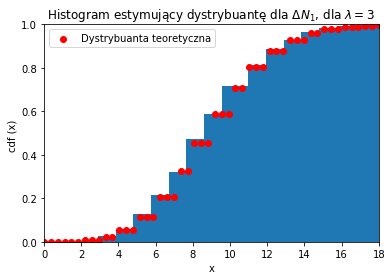

In [7]:
plt.hist(N_1_sample,bins = 40, density = True, cumulative = True,zorder = 1) #tworzymy histogram, dla próby N1
xs = np.linspace(0,18) #deklarujemy oś OX
plt.scatter(xs,sp.poisson.cdf(xs,3*3),c='red',zorder = 2,label="Dystrybuanta teoretyczna")
plt.xlim(0,18) #ustalamy osi 
plt.ylim(0,1)
plt.xlabel("x")
plt.ylabel("cdf (x) ")
plt.legend()
plt.title("Histogram estymujący dystrybuantę dla $\Delta N_{1}$, dla $\lambda = 3 $")

Text(0.5, 1.0, 'Histogram estymujący dystrybuantę dla $\\Delta N_{2}$, dla $\\lambda = 3 $')

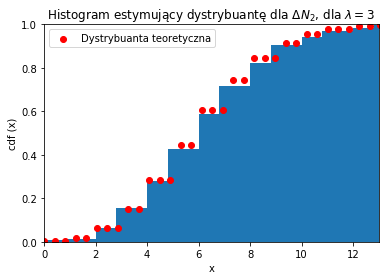

In [8]:
plt.hist(N_2_sample,bins = 40, density = True, cumulative = True,zorder = 1) #tworztmy histogram dla próby N2
xs = np.linspace(0,20) #deklarujemy wartości na osi OX
plt.scatter(xs,sp.poisson.cdf(xs,3*2),c='red',zorder = 2,label="Dystrybuanta teoretyczna")
plt.xlim(0,13) #ustalamy osi
plt.ylim(0,1)
plt.xlabel("x")
plt.ylabel("cdf (x)")
plt.legend()
plt.title("Histogram estymujący dystrybuantę dla $\Delta N_{2}$, dla $\lambda = 3 $")

Przedstawione wyżej wykresy estymujące wartość dystrybuanty, pokrywają się z dystrybuantą teoretyczną rozkładu Poissona z wartością parametru $\lambda$, którą założyliśmy. Świadczy to o poprawności rozumowania oraz wykonania symulacji. Dla pewności sprawdzimy jednak co stanie się gdy porównamy  wykresy dystrybuanty teoretycznej i empirycznej.  

Text(0.5, 1.0, 'Porównanie dystrybuant dla $\\Delta N_{1}$, dla $\\lambda = 3 $')

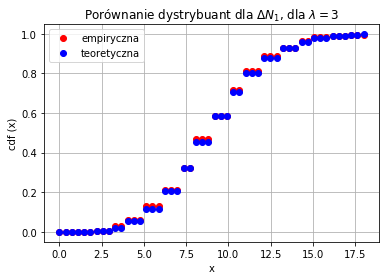

In [9]:
from statsmodels.distributions.empirical_distribution import ECDF #importujemy bibliotekę,
                                                                  #która umożliwia tworzenie dystrybuanty empirycznej

xs = np.linspace(0,18)                        #deklarujemy wartości na osi OX
e = ECDF(N_1_sample)                          #tworzymy dystrybuantę empiryczną dla próby N1
plt.plot(xs,e(xs),'ro',label = "empiryczna")   #tworzymy wykresy 
plt.plot(xs,sp.poisson.cdf(xs,9),'bo',label = "teoretyczna") 
plt.grid(True)
plt.xlabel("x")
plt.ylabel("cdf (x)")
plt.legend()
plt.title("Porównanie dystrybuant dla $\Delta N_{1}$, dla $\lambda = 3 $")

Text(0.5, 1.0, 'Porównanie dystrybuant dla $\\Delta N_{2}$, dla $\\lambda = 3 $')

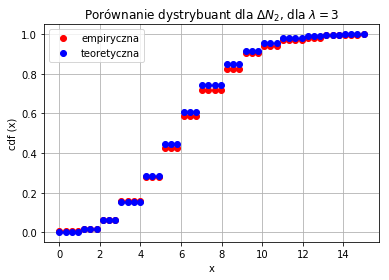

In [10]:
xs = np.linspace(0,15) #deklarujemy wartości z osi OX
e = ECDF(N_2_sample)   #wyliczamy dystrybuantę empiryczną
plt.plot(xs,e(xs),'ro',label="empiryczna") 
plt.plot(xs,sp.poisson.cdf(xs,6),'bo',label = "teoretyczna") 
plt.grid(True)
plt.xlabel("x")
plt.ylabel("cdf (x)")
plt.legend()
plt.title("Porównanie dystrybuant dla $\Delta N_{2}$, dla $\lambda = 3 $")

Patrząc na powyższe wykresy, widać, że dystrybuanta teoretyczna pokrywa się z dystrybuantą empiryczną nieal idealnie. W związku z czym utwierdzamy się w przekonaniu o poprawności przeprowadzenia symulacji.

Na koniec pozostało porównać funkcje charakterystyczne.

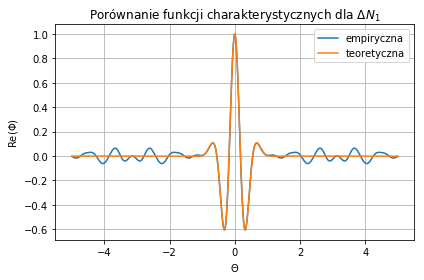

In [22]:
theta = np.linspace(-5,5,1000)  #dekarujemy wartości parametru theta

empirical_char = np.empty(len(theta),dtype = complex)  #tworzymy tablicę na wyniki, ustalamy jej typ na "complex"
                                                       #ponieważ otrzymamy liczby zespolone(część rzeczywistą i urojoną)
for i in range(len(theta)):
    empirical_char[i] = np.mean(np.exp(1j * theta[i] * N_1_sample))   #wyliczamy empirycznie funkcję charakterystyczną N1

plt.plot(theta, np.real(empirical_char), label='empiryczna')  #część rzeczywista f.empirycznej
plt.plot(theta, np.real(np.exp(3*(3)*(np.exp(1j*theta)-1))), label='teoretyczna')  #część rzeczywista f.teoretycznej
plt.legend()
plt.grid(True)
plt.title("Porównanie funkcji charakterystycznych dla $\Delta N_{1}$")
plt.ylabel("Re($\Phi$)")
plt.xlabel("$ \Theta $")
plt.tight_layout()



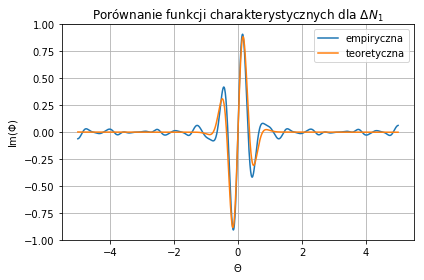

In [80]:
plt.plot(theta, np.imag(empirical_char), label='empiryczna') #część urojona f.empirycznej
plt.plot(theta, np.imag(np.exp(3*(3)*(np.exp(1j*theta)-1))), label='teoretyczna') #część urojona f.teoretycznej
plt.legend()
plt.grid(True)
plt.title("Porównanie funkcji charakterystycznych dla $\Delta N_{1}$")
plt.ylabel("Im($\Phi$)")
plt.xlabel("$ \Theta $")
plt.tight_layout()

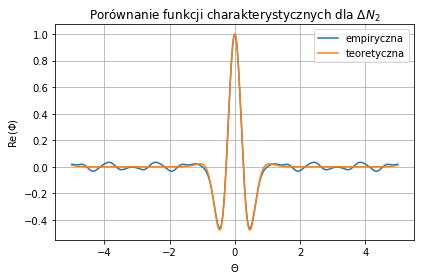

In [23]:
empirical_char = np.empty(len(theta),dtype = complex) #tworzymy tablicę na wyniki, dtype ustalony na complex 
                                                      #ponieważ wynikiem będą liczby zespolone
for i in range(len(theta)):
    empirical_char[i] = np.mean(np.exp(1j * theta[i] * N_2_sample))  #tworzenie f.empirycznej dla próby N2 
    
plt.plot(theta, np.real(empirical_char), label='empiryczna') #część rzeczywista funkcji empirycznej
plt.plot(theta, np.real(np.exp(3*(2)*(np.exp(1j*theta)-1))), label='teoretyczna')  #część rzeczywista f.teoretycznej
plt.legend()
plt.grid(True)
plt.title("Porównanie funkcji charakterystycznych dla $\Delta N_{2}$")
plt.ylabel("Re($\Phi$)")
plt.xlabel("$ \Theta $")
plt.tight_layout()


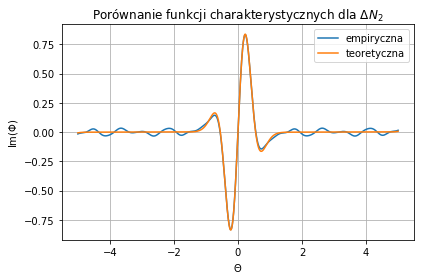

In [24]:
plt.plot(theta, np.imag(empirical_char), label='empiryczna') #część urojona f.empirycznej
plt.plot(theta, np.imag(np.exp(3*(2)*(np.exp(1j*theta)-1))), label='teoretyczna') #część urojona f.teoretycznej
plt.legend()
plt.grid(True)
plt.title("Porównanie funkcji charakterystycznych dla $\Delta N_{2}$")
plt.ylabel("Im($\Phi$)")
plt.xlabel("$ \Theta $")
plt.tight_layout()

Tak jak można było się spodziewać, powstałe w ten sposób wykresy empirycznie tworzonej funkcji charakterystycznej pokrywają się z tymi teoretycznymi. Nie jest to jednak zaskoczeniem, ponieważ wyżej przeprowadzone sprawdzenie już potwierdziło poprawność symulacji.

W kolejnej części zadania dowiedziemy, że tak powstałe próby przyrostów są nieskorelowane. W tym celu wyliczymy współczynnik korelacji między próbami.


In [8]:
corelation = np.corrcoef(N_1_sample,N_2_sample)
print(corelation)

[[ 1.         -0.02066482]
 [-0.02066482  1.        ]]


korelacja $\Delta N_{1}$ z $\Delta N_{2}$ to elementy 1,2 i 2,1 z powyższej macierzy.Jak widzimy są one bliskie 0. Co świadczy o tym, że nie są ze sobą skorelowane. Dla pewności czy ta zależność zachodzi dla różnych przyrostów stworzymy jeszcze dwie próby i sprawdzimy jak dla nich wygląda współczynnik korelacji.

In [84]:
N_3_sample = np.empty(1000)
N_4_sample = np.empty(1000)

for i in range(1000):
    S = PoissonProcess(7,3)
    N_3_sample[i] = increasement_counter(S,0,2)
    N_4_sample[i] = increasement_counter(S,2,6)

In [85]:
corelation = np.corrcoef(N_3_sample,N_4_sample)
print(corelation)

[[1.         0.03077934]
 [0.03077934 1.        ]]


Jak widać, dla kolejnego przypadku również współczynnik korelacji jest bliski 0. Możemy więc wnioskować, że taka zależność zachodzi dla różnych następujących po sobie przyrostów. Na koniec pokażemy, że tak powstałe próby są nie tylko nieskorelowane, ale także niezależne. W tym celu sprawdzimy, czy podane w treści zadania prawdopodobieństwa rzeczywiście są równe.

Wykonajmy sprawdzenie dla:
    -  j = 15, k = 9 
    -  j = 11, k = 6 
    -  j = 12, k = 7 

Prawą stronę równania policzymy tak, że sprawdzimy ile razy w wysymulowanej próbie $\Delta N_{1} = j$ i $\Delta N_{2} = k $. Stworzymy więc funkcję, wyliczającą szukane prawdopodobieństwo.

In [26]:
def probability_counter1(j,sample): #funkcja przyjmuje argumenty j-wartość której prawdopodobieństwo występowania 
                                    #chcemy obliczyć, sample - próba w której będziemy to sprawdzać
    counter_j = 0                   #deklarujemy zmienną przy pomocy której będziemy zliczać występowanie wartości
    length = len(sample)            #obliczamy długość próby 
    
    for i in range(length):         #pętla na długość próby
        if sample[i] == j:          #jeżeli wartość j występuje na danej pozycji
            counter_j += 1          #zwiększ licznik o 1
    
    return counter_j/length         #liczbę elementów dzielimy na długość próby uzyskując prawdopodobieństwo

Lewą stronę obliczymy zaś sprawdzając jakie jest prawdopodobieństwo, że w obu wektorach na tych samych pozycjach stoją te same wartości.

In [27]:
def probability_counter2(j,k,sample1,sample2): #funkcja przyjmuje parametry j,k - wartości których prawdopodobieństwo
                                               #występowania będziemy sprawdzać, sample1/2 - próby dla których sprawdzamy
    counter = 0                                #deklarujemy licznik
    n = len(sample1)                           #obliczamy długości prób
    m = len(sample2)
    if n == m:                                 #sprawdzenia możemy dokonać tylko gdy próby są równe
        for i in range(n):
            if sample1[i] == j and sample2[i] == k: #sprawdzamy,czy warunek został spełniony
                counter += 1                   #jeśli tak zwiąkszamy licznik
    return counter/n                           #liczbę elementów dzielimy na długość próby uzyskując prawdopodobieństwo

Posiadając tak skonstruowane liczniki prawdopodobieństwa możemy dokonać sprawdzenia:
    

In [64]:
a = probability_counter1(15,N_1_sample) #prawdopodobieństwo, że w próbie N1 występuje element o wartości j=15
b = probability_counter1(9,N_2_sample)  #prawdopodobieństwo, że w próbie N2 występuje element o wartości k=9
c = probability_counter2(15,9,N_1_sample,N_2_sample) #prawdopodobieństwo że na tych samych pozycjach znajdują się wartości
print("P = ", a*b)
print("L = ",c)

P =  0.0016750000000000003
L =  0.002


In [61]:
a = probability_counter1(11,N_1_sample)
b = probability_counter1(6,N_2_sample)
c = probability_counter2(11,6,N_1_sample,N_2_sample)
print("P = ", a*b)
print("L = ",c)

P =  0.018012
L =  0.019


In [60]:
a = probability_counter1(12,N_1_sample)
b = probability_counter1(7,N_2_sample)
c = probability_counter2(12,7,N_1_sample,N_2_sample)
print("P = ", a*b)
print("L = ",c)

P =  0.014544
L =  0.014


Widzimy, że dla różnych wartości $j$ i $k$ prawdopodobieństwa są niemalże równe. Różnice pojawiają się dopiero w okolicach trzeciego miejsca po przecinku, jednak w momencie zaokrąglania do dwóch miejsc po przecinku zawsze otrzymamy ten sam wynik. Świadczy to o tym, że próby są nie tylko nieskorelowane, ale także niezależne. Pojawiające się róznice mogą wynikać ze skończonej liczby bitów.

## Zadanie 2

W zadaniu drugim należy wygenerować niejednorodny proces Poissona dla $\lambda(t) = ln(t+1)$, a następnie wyestymować jego funkcję wartości oczekiwanej $\hat{m}(t)$. Stworzyć jej wykres i porównać z krzywą teoretyczną. Należy także narysować wykres trajektorii $N_{t}$ i ocenić czy układają się one wzdłuż krzywej $ m(t)$.


$\textbf{Niejednorodnym procesem Poissona}$ nazywamy proces liczący $N(t)$, $t\geq 0 $ z intensywnością, która jest funkcją $\lambda(t)$ gdy spełnia poniższe warunki:

- $N(0) = 0$
- $N(t)$ ma niezależne przyrosty
- $P(N(t+h) - N(t) = 1) = \lambda (t)h +o(h)$
- $P(N(t+h) - N(t) \geq 2) = o(h)$

Funkcja wartości oczekiwanej $m(t)$ wyraża się następującym wzorem:
<center>
    $m(t) = E[N_{t}] = \int_{0}^{t} \lambda(s) ds$
</center>

Poniższa funkcja jest odpowiedzialna za generowanie niejednorodnego procesu Poissona, dla funkcji $\lambda(t)$ zadanej w treści zadania, metodą rozrzedzania.

In [2]:
def InhomogeneousPoissonProcess(T): #funkcja przyjmuje jako argument T - czas trwania obserwacji
    
    t = np.linspace(0,T,100)          #tworzymy wektor czasów w celu wygenerowania max lambda(t)
    flambda = np.log(t+1)             #deklarujemy funkcję intensywności lambda(t)
    lamb = max(flambda)               #obliczamy jej maksimum
    S = [0]                           #tworzymy tablicę na momenty skoków, deklarując wartość dla t=0
    t = 0                             #deklarujemy czas rozpoczęcia obserwacji
    while t <= T:                     #generujemy dopóki nie przektoczymy maksymalnego czasu obserwacji
        U = np.random.rand()          #generujemy losową wartość z przedziału[0,1]
        t = t - ((1 /lamb) * np.log(U)) #tworzymy kolejne czasy skoków
        if t > T:                    #w momencie przekroczenia czasu obserwacji przerywamy program
            break
        else:
            U2 = np.random.rand()    #generujemy kolejną wartość losową z przedziału[0,1] niezależną od U1
            if U2 <= (np.log(t+1))/lamb:  #prawdopodobieństwo z jakim zapisujemy momenty skoków
                S.append(t)          #zapisujemy moment skoku
    return S                         #zwracamy tablicę z momentami skoków

Do porównania wartości oczekiwanej potrzebna będzie nam krzywa teoretyczna. Poniżej zdefiniujemy funkcję odpowiedzialną za tworzenie się tej krzywej. Wzór został wyliczony metodą analityczną (policzenie całki zapisanej powyżej) dla rozważanego w zadaniu przypadku.

In [3]:
def m(t): #funkcja przyjmuje argument t-czas dla którego wyliczana jest wartość
    return np.log(t+1) + t*np.log(t+1) - t

Teraz zajmiemy się wyestymowaniem empirycznej watości oczekiwanej. Zanim do tego przystąpimy wyznaczymy liczbę skoków do momentu t.

In [4]:
def N(t,S):                         #funkcja przyjmuje argunety:t-wektor czasowy, S-momenty skoków
    N = np.empty(len(t))            #tworzymy tablicę na wyniki 
    for i in range(len(t)):         #dla wektora czasowego 
        for j in range(0,len(S)-1): #dla każdego skoku
            if t[i]>= S[j] and t[i] <S[j+1]: #sprawdzamy czy t znajduje się w zadanym przedziale
                N[i] = j            #jeśli tak do tablicy dodajemy wartość j
    return N[:-1]                   #zwracamy tablicę z liczbą skoków do momentu t


def estimated_value(T,M):               #funkcja przyjmuje argumenty T-czas obserwacji, M-liczba trajektorii
    t = np.linspace(0,T)                #tworzymy wektor czasowy do momentu Tmax
    S = InhomogeneousPoissonProcess(T)  #generujemy momenty skoków niejednorodnego procesu Poissona
    N_results = np.empty([M,len(t)-1])  #tworzymy tablicę na poszczególne trajektorie

    for i in range(M):                      #dla zadanej liczby trajektorii
        S = InhomogeneousPoissonProcess(T)  #generujemy momenty skoków
        N_results[i] = N(t,S)               #dodajemy do tablicy 
    Meann = np.mean(N_results,axis=0)       #liczymy średnią po indeksie axis=0
    
    return t[:-1], Meann               #funkcja zwraca wektor czasów i wartości estymowanej wartości oczekiwanej 
        

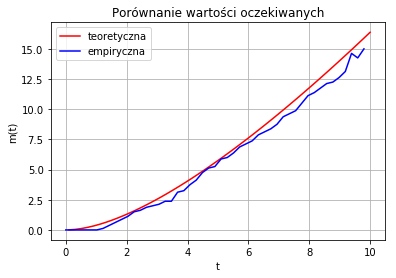

In [7]:
ts = np.linspace(0.1,10)           #tworzymy wektor czasów
y = m(ts)                          #tworzymy wartości krzywej teoretycznej 

estimation = estimated_value(10,8) #wyliczamy estymowaną wartość oczekiwaną 
time = estimation[0]               #odwołujemy się do czasów
value = estimation[1]              #oraz wartości wartości oczekiwanej 

plt.plot(ts,y,'r',label = "teoretyczna")    #wykres krzywej teoretycznej 
plt.plot(time,value,"b",label="empiryczna") #wykres krzywej empirycznej
plt.title("Porównanie wartości oczekiwanych")
plt.xlabel('t')
plt.ylabel('m(t)')
plt.grid(True)
plt.legend()

Widzimy, że estymowana wartość oczekiwana pokrywa się z teoretyczną krzywą wartości oczekiwanej, co świadczy o poprawności wykonanej symulacji.

Wygenerujemy teraz kilka trajektorii i zobaczymy, czy układają się one wzdłóż krzywej teoretycznej wartości oczekiwanej.

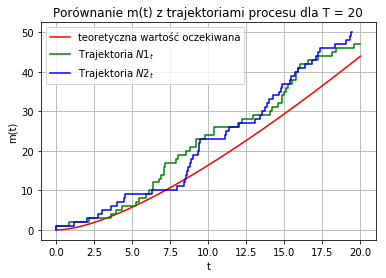

In [11]:
X1 = InhomogeneousPoissonProcess(20) #generujemy momenty skoków jednej trajektorii
n = len(X1)
Y1 = np.arange(n)                    #generujemy wartości na osi OY 

X2 = InhomogeneousPoissonProcess(20) #generujemy momenty skoków drugiej trajektorii
n2 = len(X2)
Y2 = np.arange(n2)                   #generujemy wartości na osi OY

ts = np.linspace(0,20)              #wektor czasów 
y = m(ts)                           #krzywa teoretyczna wartości oczekiwanej 
plt.plot(ts,y,'r',label = "teoretyczna wartość oczekiwana")
plt.step(X1,Y1,'g',label = "Trajektoria $N1_{t}$")
plt.step(X2,Y2,'b',label = "Trajektoria $N2_{t}$")
plt.title("Porównanie m(t) z trajektoriami procesu dla T = 20")
plt.xlabel('t')
plt.ylabel('m(t)')
plt.grid(True)
plt.legend()

Widzimy, że trajektorie układają się wzdłuż krzywej teoretycznej $m(t)$, sprawdźmy jednak co stanie się w momencie zwiększenia czasu obserwacji.

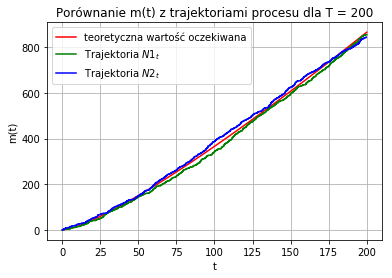

In [12]:
X1 = InhomogeneousPoissonProcess(200)
n = len(X1)
Y1 = np.arange(n)

X2 = InhomogeneousPoissonProcess(200)
n2 = len(X2)
Y2 = np.arange(n2)

ts = np.linspace(0,200)
y = m(ts)
plt.plot(ts,y,'r',label = "teoretyczna wartość oczekiwana")
plt.step(X1,Y1,'g',label = "Trajektoria $N1_{t}$")
plt.step(X2,Y2,'b',label = "Trajektoria $N2_{t}$")
plt.title("Porównanie m(t) z trajektoriami procesu dla T = 200")
plt.xlabel('t')
plt.ylabel('m(t)')
plt.grid(True)
plt.legend()

Patrząc na powyższy wykres mocniej utwierdzamy się w przekonaniu, że trajektorie układają się wzdłuż krzywej teoretycznej $m(t)$. Widzimy, że im większy ustalimy horyzont czasowy, tym trajektorie są bardziej zbliżone do wartości $m(t)$

## Zadanie 3

W zadaniu tym należy sprawdzić, na ile efektywność generowania niejednorodnego procesu Poissona „od tyłu” zależy od funkcji $m(t)$ (oraz $\lambda(t)$),czyli należy porównać szybkość generowania $S_{k}$ w przypadkach, w których otrzymana dystrybuanta jest prosta do odwrócenia oraz kiedy jest trudna do odwrócenia.


Generowanie niejednorodnego procesu Poissona "od tyłu" polega na losowaniu ilości zdarzeń do $T$, czyli zmiennej $ N \sim Poiss(m(T))$,a następnie odtworzeniu $S_{1}, . . . , S_{N}$ jako posortowanych zmiennych z próby o rozkładzie zadanym dystrybuantą $F(t) = \frac{m(t)}{m(T)}$.


Zależność sprawdzimy dla trzech funkcji intensywności:
- $ \lambda_{1}(t) = 3$
- $ \lambda_{2}(t) = e^{t}$
- $ \lambda_{3}(t) = t^{2}$


Dla powyższych $\lambda$ funkcje wartości oczekiwanej $m(t)$ mają postać:
- $m_{1}(t) = 3t$
- $m_{2}(t) = e^{2}(e^{t}-1)$
- $m_{3}(t) = \frac{1}{3}t^{3}$

Powyższe funkcje zaimplementujemy jako funkcje zależne od czasu.

In [4]:
def m(l,t):                       #funkcja przyjmuje argumenty l-indeks rozważanej funkcji, t- wektor czasowy  
    if l == 1:                    #krzywa teoretyczna dla m1(t)
        return 3*t
    if l ==2:                     #krzywa teoretyczna dla m2(t)
        return np.exp(2)*(np.exp(t) - 1)
    if l ==3:                     #krzywa teoretyczna dla m3(t) 
        return (t**3)/3


Wiemy, że dystrybuanta ma postać:
<center>
$F(t) = \frac{m(t)}{m(T)}$
    </center>

Jednak do wygenerowania procesu Poissona wykorzystamy dystrybuanty odwrotne do tak skonstruowanej dla każdego przypadku. Dystrybuanty te, jak i odwrotne do nich zostały wyliczone analitycznie, w poniższej funkcji skorzystamy już z gotwych wzorów.

In [5]:
def PoissonProcess(l,T):               #funkcja przyjmuje argumenty: l-indeks funkcji m(t), T-maksymalny czas obserwacji
    if l == 1:                         #generowanie momentów dla m1(t)
        N1 = np.random.poisson(m(1,T)) #generujemy ilość zdarzeń
        U1 = np.random.rand(int(N1))   #generujemy N losowych wartości z przedziału 0,1
        S1 = U1*T                      #wyliczamy wartości skoków
        S1 = np.sort(S1)               #sortujemy je 
        moments = np.r_[0,S1,T]        #tworzymy wektor wynikowy momentów skoków 
    if l == 2:                         #generowanie momentów dla m1(t)
        N2 = np.random.poisson(m(2,T))
        U2 = np.random.rand(int(N2))
        S2 = np.log((np.exp(T)*U2-U2+1))
        S2 = np.sort(S2)
        moments = np.r_[0,S2,T]
    if l == 3:                         #generowanie momentów dla m1(t)
        N3 = np.random.poisson(m(3,T))
        U3 = np.random.rand(int(N3))
        S3 = (3*U3)**(1/3)
        S3 = np.sort(S3)
        moments = np.r_[0,S3,T]
    return moments                     #funkcja zwraca wektor momentów skoków niejednorodnego procesu poissona 

Teraz przejdziemy do części właściwej zadania. Porównamy efektywność pracy algorytmu dla różnych $m(t)$, czyli sprawdzimy czasy pracy algorytmu. Pomiar czasu powtórzymy 100 razy i weźmiemy średnią z wyników dla uzyskania bardziej wiarygodnych czasów, ponieważ przy wyliczaniu pojedyńczych czasów zauważalne są pewne różnice.

In [12]:
import time                  #importujemy bibliotekę do mierzenia czasów 

time1=0

for i in range(100):
    start1 = time.time()        #rozpoczynamy pomiar czasu
    PoissonProcess(1,10)            #wywołujemy funcję dla m1(t)
    end1 = time.time()          #kończymy pomiar czasu 
    time1 += (end1 - start1)           #wyliczamy różnicę, aby dostać czas pracy algorytmu

print("Czas generowanie Sk dla m1(t) = : ", time1/100)

time2=0

for i in range(100):
    start2 = time.time()
    PoissonProcess(2,10)           #wywołujemy funcję dla m1(t)
    end2 = time.time()
    time2 += (end2 - start2)

print("Czas generowanie Sk dla m2(t) = : ", time2/100)

time3=0

for i in range(100):
    start3 = time.time()
    PoissonProcess(3,10)            #wywołujemy funcję dla m1(t)
    end3 = time.time()
    time3 += (end3 - start3)

print("Czas generowanie Sk dla m3(t) = : ", time3/100)

Czas generowanie Sk dla m1(t) = :  0.00012991666793823241
Czas generowanie Sk dla m2(t) = :  0.03590151071548462
Czas generowanie Sk dla m3(t) = :  0.00014994621276855468


Patrząc na funkcje $m(t)$ i utworzone dla nich dystrybuanty odwrotne przed wykonaniem testu mogliśmy wnioskować, że najbardziej skomplikowaną funkcją była $m_{2}(t)$  potem $m_{3}(t)$ i na końcu $m_{1}(t)$, chociaż te dwie ostanie wydają się być na podobnym stopniu skomplikowania. Po porównaniu czasów generowania $ S_{k} $ widzimy,że dokładnie w ten sam sposób prezentują się czasy generowania momentów skoków. Najdłużej trwa to dla funkcji $m_{2}(t)$, czyli dokładnie tak jak zakładaliśmy, czasy generowanie $S_{k}$ dla dwóch pozostałych funkcji są zbliżone jednak dla funkcji $m_{3}(t)$ czas ten jest troszeczkę dłuższy, co potwierdza wpływ funkcji $m(t)$ na efektywnośc generowania niejednorodnego porcesu Poissona.

## Zadanie 4

W zadaniu tym należy przeprowadzić symulację złożonego procesu Poissona dla trzech wybranych rozkładów.

$\textbf{Złożonym procesem Poissona}$ nazywamy  proces stochastyczny, w którym w losowych momentach czasu (zadanymi procesem Poissona) następuje zmiana o losową wartość, po czym do czasu następnej zmiany wartość procesu jest wielkością stałą.

Przeprowadzimy symulację dla następujących trzech rozkładów:
- $ N (0,1)$
- $ Exp (1)$
- $ C (0,1)$

Zaczniemy od stworzenia trajektorii złożonego procesu dla zadeklarowanych wyżej rozkładów. Do wygenerowania momentów skoków wykorzystamy funkcję do ich generowania dla jednorodnego procesu poissona stworzoną w zadaniu pierwszym($PoissonProcess$) 

In [42]:
t = PoissonProcess(10,1) #generujemy momenty skoków 

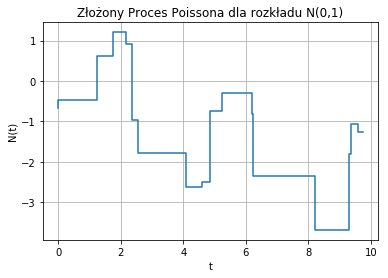

In [47]:
n = len(t)               #zliczamy ilość skoków
X1 = np.random.randn(n)  #generujemy tyle zmiennych losowych o rozkładzie N(0,1)
Y1 = np.cumsum(X1)       #liczymy sumę kumulatywną wartości zmienych losowych, aby uzyskać wartości na osi OY
    
    
plt.step(t,Y1)          #rysujemy trajektorię 
plt.title("Złożony Proces Poissona dla rozkładu N(0,1)")
plt.xlabel("t")
plt.ylabel("N(t)")
plt.grid(True)

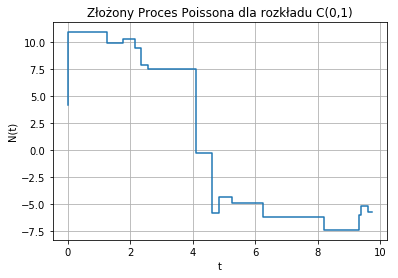

In [45]:
X2 = sp.cauchy.rvs(0,1,n)  #generujemy n zmiennych z rozkładu C(0,1) 
Y2 = np.cumsum(X2)          

plt.step(t,Y2)             #rysujemy trajektorię 
plt.title("Złożony Proces Poissona dla rozkładu C(0,1)")
plt.xlabel("t")
plt.ylabel("N(t)")
plt.grid(True)

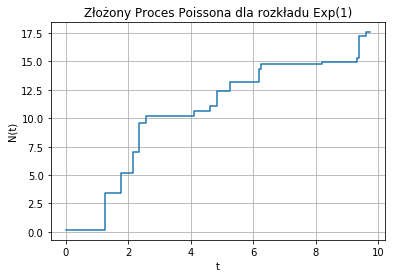

In [44]:
X3 = sp.expon.rvs(size = n) #generujemy n wartości Exp(1)
Y3 = np.cumsum(X3)

plt.step(t,Y3)             #rysujemy trajektorię 
plt.title("Złożony Proces Poissona dla rozkładu Exp(1)")
plt.xlabel("t")
plt.ylabel("N(t)")
plt.grid(True)

Porównamy teraz funkcje charakterystyczne teoretyczne z tymi wyestymowanymi dla prób, które zbierzemy dla rozważanych wyżej rozkładów. Wiemy, że w ten sposób skonstruowane próby $X(t)$ będą miały rozkład zadany funkcją charakterystyczną:


<center>
    $\phi_{X(t)}(\theta)=exp(\lambda t(\phi_{J}(\theta)−1))$
    </center>

In [65]:
#funkcje przjmują argumenty:t-czas obserwacji 
    
def SampleE(t):                      #rozkład wykładniczy                            
    N = np.random.poisson(t, 1)      #generujemy ilość zdarzeń do momentu t
    Y = np.random.exponential(1,N)   #generujemy losowe wartości z rozkładu Exp(1) 
    X = np.sum(Y)                    #sumujemy je 
    return X

def SampleN(t):                         #rozkład normalny 
    N = np.random.poisson(t, 1)
    Y = np.random.normal(0, 1, N)       #generujemy losowe wartości z rozkładu N(0,1)
    X = np.sum(Y) 
    return X

def SampleC(t):                         #rozkład Cauchy'ego
    N = np.random.poisson(t, 1)
    Y = np.random.standard_cauchy(N)    #generujemy losowe wartości z rozkładu C(0,1)
    X = np.sum(Y)
    
    return X                            #zwracamy próbę dla zadanego rozkladu 

Stworzymy teraz funkcje odpowiedzialne za generowanie krzywych teoretycznych funkcji charakterystycznych rozważanych rozkładów.

In [66]:
#funkcje przyjmuja za argument:t-czas obserwacji, theta-wektor wartości theta

def char_tE(t,theta):                   #krzywa dla rozkładu wykładniczego
    return np.exp(t*(1/(1-1j*theta)-1))

def char_tN(t,theta):                   #krzywa dla rozkladu normalnego
    return np.exp(t*(np.exp(-theta**2/2)-1))

def char_tC(t,theta):                   #krzywa dla rozkładu cauchy'ego
    return np.exp(t*(np.exp(-abs(theta))-1))

A następnie funkcję odpowiedzialną za generowanie empirycznej funkcji charakterystycznej na podstawie zebranej próby.

In [69]:
def char_emp(t, n, distribution):  #funkcja przyjmuje argumenty:t-czas obserwacji,n-liczba elementów
                                   #distribution-funkcja z której chcemy próbę
    X = np.empty(n)                #tablica na wyniki
    for i in range(n):
        X[i] = distribution(t)     #dodajemy elementy próby 
    
    theta = np.linspace(-4,4,n)    #definiujemy wektor theta
    char_emp = np.empty(len(theta),dtype = complex) #tworzymy tablicę na wyniki estymowania funkcji
    
    for i in range(len(theta)):
        char_emp[i] = np.mean(np.exp(1j * theta[i] * X)) #estymujemy funkcję charakterystyczną
    return theta, char_emp         #funkcja zwraca wektor theta i estymowaną funkcję charakterystyczną 

W tej części przejdziemy do tworzenia wykresów w celu porównania funkcji.

Text(0, 0.5, 'Re($\\Phi(\\Theta))$')

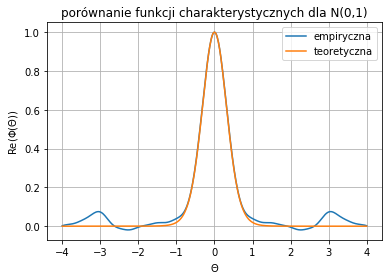

In [71]:
t = 10                               #deklarujemy czas obserwacji 
n = 500                              #deklarujemy liczbę elementów próby 
theta, c_emp = char_emp(t,n,SampleN) #tworzymy f.empiryczną dla rozkładu normalnego
c_teo = char_tN(t,theta)             #tworzymy f.empiryczną 
plt.plot(theta,np.real(c_emp),label = "empiryczna") #rysujemy część rzeczywistą dla f.emp
plt.plot(theta,np.real(c_teo),label = "teoretyczna") #rysujemy część rzeczywistą fla f.teo
plt.legend()
plt.title("porównanie funkcji charakterystycznych dla N(0,1)")
plt.grid(True)
plt.xlabel("$\Theta$")
plt.ylabel("Re($\Phi(\Theta))$")


Text(0, 0.5, 'Im($\\Phi(\\Theta))$')

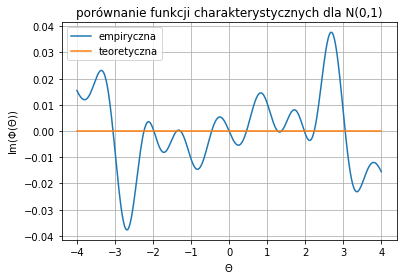

In [77]:
plt.plot(theta,np.imag(c_emp),label = "empiryczna") #rysujemy część urojoną f.emp
plt.plot(theta,np.imag(c_teo),label = "teoretyczna") #rysujemy część urojoną f.teo
plt.legend()
plt.title("porównanie funkcji charakterystycznych dla N(0,1)")
plt.grid(True)
plt.xlabel("$\Theta$")
plt.ylabel("Im($\Phi(\Theta))$")

Text(0, 0.5, 'Re($\\Phi(\\Theta))$')

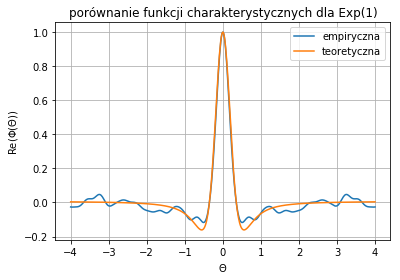

In [78]:
theta, c_emp = char_emp(t, n, poissonE) 
c_teo = char_tE(t,theta)
plt.plot(theta,np.real(c_emp),label = "empiryczna")
plt.plot(theta,np.real(c_teo),label = "teoretyczna")
plt.legend()
plt.title("porównanie funkcji charakterystycznych dla Exp(1)")
plt.grid(True)
plt.xlabel("$\Theta$")
plt.ylabel("Re($\Phi(\Theta))$")

Text(0, 0.5, 'Im($\\Phi(\\Theta))$')

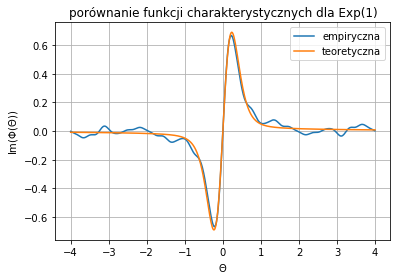

In [79]:
plt.plot(theta,np.imag(c_emp),label = "empiryczna")
plt.plot(theta,np.imag(c_teo),label = "teoretyczna")
plt.legend()
plt.title("porównanie funkcji charakterystycznych dla Exp(1)")
plt.grid(True)
plt.xlabel("$\Theta$")
plt.ylabel("Im($\Phi(\Theta))$")

Text(0, 0.5, 'Re($\\Phi(\\Theta))$')

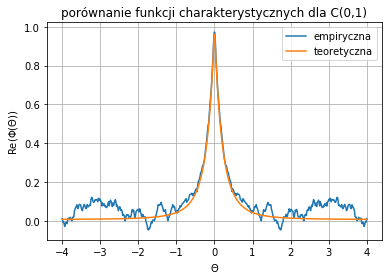

In [80]:
theta, c_emp = char_emp(t, n, poissonC)
c_teo = char_tC(t,theta)
plt.plot(theta,np.real(c_emp),label = "empiryczna")
plt.plot(theta,np.real(c_teo),label = "teoretyczna")
plt.legend()
plt.title("porównanie funkcji charakterystycznych dla C(0,1)")
plt.grid(True)
plt.xlabel("$\Theta$")
plt.ylabel("Re($\Phi(\Theta))$")

Text(0, 0.5, 'Im($\\Phi(\\Theta))$')

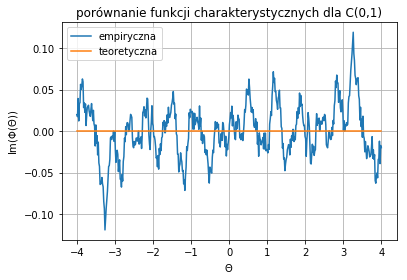

In [82]:
theta, c_emp = char_emp(t, n, poissonC)
c_teo = char_tC(t,theta)
plt.plot(theta,np.imag(c_emp),label = "empiryczna")
plt.plot(theta,np.imag(c_teo),label = "teoretyczna")
plt.legend()
plt.title("porównanie funkcji charakterystycznych dla C(0,1)")
plt.grid(True)
plt.xlabel("$\Theta$")
plt.ylabel("Im($\Phi(\Theta))$")

Patrząc na wykresy porównujące funkcje charaterystyczne dla różnych rozkładów, zarówno ich części rzeczywiste jak i urojone widać, że wykresy pokrywają się ze sobą. Widoczne są oczywiście pewne odchylenia od krzywych teoretycznych, jednak są one tak niewielkie, że możemy stwierdzić, że symulacja działa poprawnie. 

## Zadanie 5

Zadanie polega na tym aby na podstawie symulacji procesu ryzyka z $\lambda = 1$,$ \mu = \frac{1}{2}$ oraz skokami $J_{k} \sim −Exp(1)$ oraz różnych kapitałów początkowych C narysuować jego trajektorie. Następnie oszacować numerycznie prawdopodobieństwo ruiny do czasu $t = 5$. Należy także oszacować minimalny kapitał początkowy zapewniający, że prawdopodobieństwo ruiny będzie mniejsze niż 5%.


$\textbf{Procesem ryzyka}$ nazywamy złożony proces Poissona z dodatnim liniowym trendem. Innymi słowy:

<center>
$ X(t) = \sum^{N(t)}_{k=1}J_{k} + \mu t + C  $  
</center>

In [3]:
#funkcja odpowiedzialna za generowanie sumy od k=1 do N(t)

def PoissonProcessR(Lamb, t):            #funkcja przyjmuje parametry lamb-wartość parametru lamnda, t-czas
    N = np.random.poisson(t*Lamb, 1)     #losujemy liczbę zdarzeń 
    Y = -np.random.exponential(1,N)      #tworzymy N zmiennych o rozkładzie zadanym w treści zadania 
    X = np.sum(Y)                        #sumujemy zmienne 
    return X, N

Posiadając tak zdefiniowany proces Poissona stworzymy funkcję odpowiedzialną za cały proces liczący $X(t)$.

In [4]:
def X(C,T):                  #funkcja przyjmuje argumenty C-kapitał początkowy, T-czas maksymalny 
    t = np.arange(T)         #generujemy wektor czasów od 0 do T
    X = np.empty(T)          #tworzymy tablicę na wyniki
    for i in range(len(t)):  #dla każdej chwili t
        X[i] =PoissonProcessR(1, t[i])[0] + C + (1/2)*t[i]  #wyliczamy wartość X(t)
    return t,X               #funkcja zwraca wektor czasów i wartości X(t)

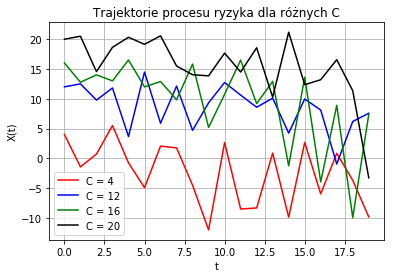

In [5]:
C4 = X(4,20)                #X(t) dla C = 4 i T=20
plt.plot(C4[0],C4[1],'r',label = 'C = 4')

C12 = X(12,20)              #X(t) dla C = 12 i T=20
plt.plot(C12[0],C12[1],'b',label = 'C = 12')

C16 = X(16,20)              #X(t) dla C = 16 i T=20
plt.plot(C16[0],C16[1],'g',label = 'C = 16')

C20 = X(20,20)              #X(t) dla C = 20 i T=20
plt.plot(C20[0],C20[1],'k',label = 'C = 20')

plt.title("Trajektorie procesu ryzyka dla różnych C")
plt.xlabel("t")
plt.ylabel("X(t)")
plt.grid(True)
plt.legend()




Patrząc na powstałe trajektorie, możemy zauważyć, że im wyższy kapitał początkowy, tym mniej prawdopodobne jest to, że w którymś momencie kapitał spółki spadnie poniżej zera, czyli zacznie ona przynosić straty. Sprawdzimy więc teraz prawdopodobieństwo ruiny do chwili $t=5$ dla różnych kapitałów początkowych. W tym celu zdefiniujemy funkcję odpowiedzialną za wyliczanie szukanego prawdopodobieństwa.

In [6]:
def ruin_probability(Lamb, T, C): #funkcja przyjmuje argumenty:Lamb-parametr lambda, T-czas, C-kapitał początkowy 
    counter = 0                   #licznik do prawdopodobieństwa
    
    for i in range(1000):         #powtarzamy generowanie 1000 razy 
        counter1 = 0              #licznik pomocniczy 
        
        for j in range(T):
            if PoissonProcessR(Lamb, j)[0] + C + j/2 < 0:  #wyliczamy X(t)
                counter1 +=1                               #jeśli X(t)<0 zwiększamy licznyk pomocniczy
        if counter1> 0:                                    #jeśli kiedykolwiek do czasu T X(t) spadnie poniżej 0
            counter += 1                                   #zwiększamy licznik do prawdopodobieństwa  
    
    return counter/1000                                    #wyliczamy szukane prawdopodobieństwo 

Text(0, 0.5, 'prawdopodobieństwo')

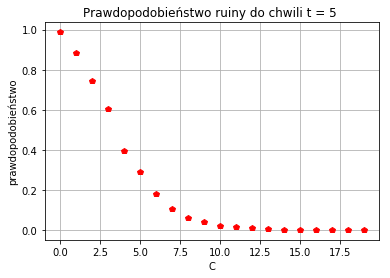

In [7]:
C_values = np.arange(0,20)                        #deklarujemy różne kapitały początkowe 
probabilities_results = np.empty(len(C_values))   #tablica na wyniki prawdopodobieństwa ruiny dla różnych C

for i in range(len(C_values)):
    probabilities_results[i] = ruin_probability(1, 5, C_values[i]) #obliczamy prawdopodobieństwo ruiny dla różnych C
    
plt.plot(C_values,probabilities_results,'rp')     #rysujemy wykres prawdopodobieństwa ruiny od kapitału C
plt.grid(True)
plt.xlabel("C")
plt.title("Prawdopodobieństwo ruiny do chwili t = 5 ")
plt.ylabel("prawdopodobieństwo")

Patrząc na powyższy wykres utwierdzamy się w przekonaniu, że im wyższy kapitał początkowy, tym mniejsza szansa na bankructwo spółki do chwili $t$. Dla $t=5$ widzimy, że w okolicach $C=11$ znacząco zbliżamy się do prawdopodobieństwa równego 0. Szukamy jednak teraz wartości kapitału początkowego $C$, dla którego prawdopodobieństwo ruiny będzie mniejsze niż 5%.

In [9]:
C = 0                                       #startujemy od kapitału równego zero 
for i in range(len(probabilities_results)): #idziemy po elementach prawdopodobieństw dla różnych C
                                            #(zaczynamy od największego p)
    if probabilities_results[i] >= 0.05:    #jeśli prawdopodobieństwo znajduje się jeszcze powyżej 
        C += 1                              #zwiększamy C o 1
print(C)

9


Widzimy stąd, że kapitał ten będzie znajdował się w okolicy $C = 9$. Spróbujmy jednak oszacować dokładniej, czy będzie on większy czy też mniejszy od 9. W tym celu sprawdzimy prawdopodobieństwa dla wartości całkowitych znajdujących się obok ($C=8$, $C=10$).

In [10]:
print('C = 8 :', ruin_probability(1, 5, 8))
print('C = 9 :', ruin_probability(1, 5, 9))
print('C = 10 :', ruin_probability(1, 5, 10))

C = 8 : 0.057
C = 9 : 0.036
C = 10 : 0.012


Widzimy stąd, że kapitał ten musi zawierać się pomiędzy $C = 8$ a $C = 9$.

In [21]:
print('C = 8.4 :', ruin_probability(1, 5, 8.2))
print('C = 8.5 :', ruin_probability(1, 5, 8.5))
print('C = 8.8 :', ruin_probability(1, 5, 8.8))

C = 8.4 : 0.056
C = 8.5 : 0.046
C = 8.8 : 0.044


Za minimalny kapitał początkowy możemy więc przyjąć $C = 8.5$.

## Zadanie 6

W tym zadaniu należało narysować trajektorie ruchu Browna oraz ułamkowego ruchu Browna dla różnych $ 0 < H < \frac{1}{2} $. Następnie odpowiedzieć na pytanie jak zachowanie trajektorii zależy od H? Na podstawie symulacji trajektorii oszacować odchylenie średniokwadratowe procesu po czym zweryfikować za pomocą wykresów czy funkcja ta zachowuje się jak prawo potęgowe $\delta^{2}_{X}(t) = t^{2H}$


$\textbf{Ruchem Browna}$ nazywamy proces gaussowski B zdefiniowany w następujący sposób:
- $B(0) = 0$
- Jego przyrosty $B(t_{2}) − B(t_{1})$ mają rozkład $N (0, t_{2} − t_{1})$
- Przyrosty na rozłącznych odcinkach są niezależne, tzn. $B(t_{2}) − B(t_{1})$ jest niezależny od $B(t_{4}) − B(t_{3})$ o ile odcinki $(t_{1}, t_{2}) $ oraz $ (t_{3}, t_{4})$ nie mają części wspólnej
- $B$ ma ciągłe trajektorie

$\textbf{Procesem gaussowskim}$ nazywamy taki proces, dla którego każdy skończeniewymiarowy rozkład jest gaussowski, tzn. każdy wektor $X(t_{1}), X(t_{2}), . . . , X(t_{n})$ ma rozkład normalny o pewnym wektorze średniej i macierzy kowariancji zależnych od wyboru $t{1}, . . . , t{n}$

$\textbf{Ułamkowy proces Browna}$ to  proces gaussowski o średniej 0 oraz kowariancji:

<center>
 $ E[B(s)B(t)] = \frac{1}{2}(|s|^{2H} + |t|^{2H} − |s − t|^{2})$   
</center>

In [23]:
def fractionalBrown(H,n,T):    #funkcja przyjmuje argumenty:H-parametr Hursta, T-czas obserwacji 
    ts = np.linspace(0,T,n+1)  #wektor czasów  
    C = np.empty((n,n))        #tablica na wyniki 

    for s in range(n):
        for t in range(n):
            C[s,t] = (abs(ts[s+1])**(2*H) + abs(ts[t+1])**(2*H) - abs(ts[s+1]-ts[t+1])**(2*H))/2 #wzór na kowariancje

    M = np.linalg.cholesky(C)    #rozkładamy macierz metodą dekompozycji cholesky'ego
    v = sp.norm.rvs(size=n)      #generujemy n wartości z rozkładu normalnego N(0,1)
    B = np.r_[0,np.matmul(M,v)]  #łączymy 0 z wektorem otrzymanym po dzieleniu wektorowym M przez v
    return ts,B                  #funkcja zwraca czasy i wartości ułamkowego procesu Browna  

Teraz dla różnych wartości $H$ wygenerujemy po 3 trajektorie i zobaczymy jak będą się układać.

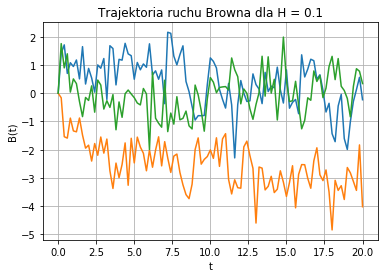

In [24]:
H1 = fractionalBrown(0.1,100,20) #generujemy pierwszą trajektorię dla H = 0.1
plt.plot(H1[0],H1[1])

H1 = fractionalBrown(0.1,100,20) #generujemy drugą trajektorię 
plt.plot(H1[0],H1[1])

H1 = fractionalBrown(0.1,100,20) #generujemy trzecią trajektorię 
plt.plot(H1[0],H1[1])

plt.title("Trajektoria ruchu Browna dla H = 0.1")
plt.xlabel("t")
plt.ylabel("B(t)")
plt.grid(True)

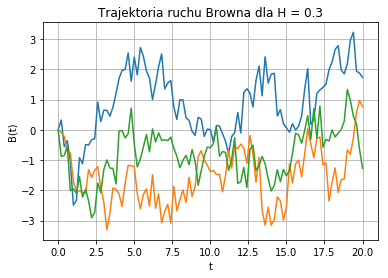

In [25]:
H2 = fractionalBrown(0.3,100,20) #generujemy pierwszą trajektorię dla H = 0.3
plt.plot(H2[0],H2[1])

H2 = fractionalBrown(0.3,100,20) #generujemy drugą trajektorię 
plt.plot(H2[0],H2[1])

H2 = fractionalBrown(0.3,100,20) #generujemy trzecią trajektorię 
plt.plot(H2[0],H2[1])

plt.title("Trajektoria ruchu Browna dla H = 0.3")
plt.xlabel("t")
plt.ylabel("B(t)")
plt.grid(True)

Ułamkowy ruch browna dla $H = \frac{1}{2}$ to klasyczny ruch Browna, więc stwórzmy też jego trajektorie.

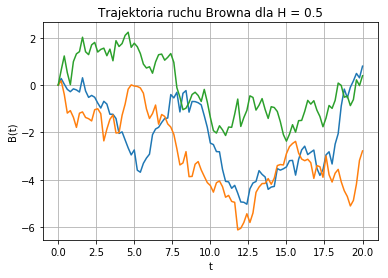

In [26]:
H3 = fractionalBrown(0.5,100,20) #generujemy pierwszą trajektorię dla H = 0.5
plt.plot(H3[0],H3[1])

H3 = fractionalBrown(0.5,100,20) #generujemy drugą trajektorię 
plt.plot(H3[0],H3[1])

H3 = fractionalBrown(0.5,100,20) #generujemy trzecią trajektorię 
plt.plot(H3[0],H3[1])

plt.title("Trajektoria ruchu Browna dla H = 0.5")
plt.xlabel("t")
plt.ylabel("B(t)")
plt.grid(True)

Patrząc na powyższe wykresy możemy ocenić zależność trajektorii od wartości $H$ tym większe są różnice pomiędzy kolejnymi skokami. Wraz z zwiększaniem wartości parametru $H$ zauważamy, że wykres staje się coraz bardziej gładki ze względu na fakt występujących mniejszych różnic wartości pomiędzy kolejnymi czasami.

Na koniec zajmiemy się oszacowaniem odchylenia średniokwadratowego i sprawdzimy, czy zachowuje się ono jak prawo potęgowe $t^{2H}$.

In [42]:
def deviation(H,n,T):                   #funkcja przyjmuje argumenty:H-parametr Hursta, T-czas obserwacji 
    deviation = np.empty((100, n + 1)) #tworzymy pustą tablicę na wyniki

    for i in range(100):
        deviation[i, :] = fractionalBrown(H,n,T)[1]  #dodajemy do tablicy wartości ułamkowego procesu Browna

    deviation = np.mean(deviation ** 2, axis=0)      #liczymy średnią po indeksie i=0
    return deviation                                 #funkcja zwraca esytmowane odchylenie średniokwadratowe

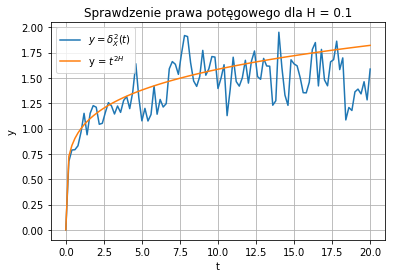

In [43]:
H1 = deviation(0.1,100,20)                     #estymowane odchylenie dla H = 0.1
n=len(H1)
t = np.linspace(0,20,n)                        #wektor czasów
plt.plot(t,H1,label='$y = \delta_X^2(t)$')     #rysujemy estymowane ochylenie
plt.plot(t, t**(2*0.1),label='y = $t^{2H}$')   #prawo potęgowe
plt.title("Sprawdzenie prawa potęgowego dla H = 0.1")
plt.xlabel("t")
plt.ylabel("y")
plt.grid(True)
plt.legend()

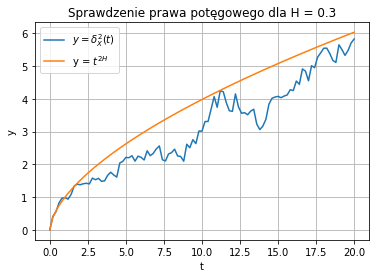

In [44]:
H2 = deviation(0.3,100,20)                      #estymowane odchylenie dla H = 0.3
n=len(H2)
t = np.linspace(0,20,n)                         #wektor czasów
plt.plot(t,H2,label='$y = \delta_X^2(t)$')      #rysujemy estymowane ochylenie
plt.plot(t, t**(2*0.3),label='y = $t^{2H}$')    #prawo potęgowe
plt.title("Sprawdzenie prawa potęgowego dla H = 0.3")
plt.xlabel("t")
plt.ylabel("y")
plt.grid(True)
plt.legend()

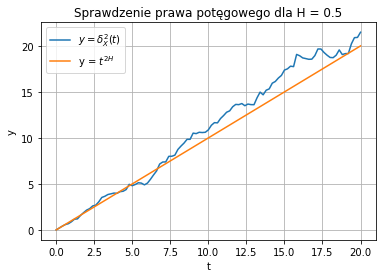

In [45]:
H3 = deviation(0.5,100,20)                      #estymowane odchylenie dla H = 0.5
n=len(H3)
t = np.linspace(0,20,n)                         #wektor czasów
plt.plot(t,H3,label='$y = \delta_X^2(t)$')      #rysujemy estymowane ochylenie
plt.plot(t, t**(2*0.5),label='y = $t^{2H}$')    #prawo potęgowe
plt.title("Sprawdzenie prawa potęgowego dla H = 0.5")
plt.xlabel("t")
plt.ylabel("y")
plt.grid(True)
plt.legend()

Patrząc na powyższe wykresy widzimy że oszacowanie odchylenia średniokwadratowego dla różnych wartości $H$ układa się wzdłuż krzywej teoretycznej. Im bardziej zbliżamy się z $H$ do wartości $0.5$, tym bardziej krzywa teoretyczna, jak i ta estymowana zbliża się kształtem do funkcji liniowej. Dla wartości mniejszych układa się jak $log(t)$, natomiast dla $H>0.5$ będzie zachowować się jak $exp(t)$. Możemy więc wywnioskować, że oszacowanie ochylenia średniokwadratowego dla ułamkowego ruchu Browna zachowuje się jak prawo potęgowe.